# Logistic Regression Assignment

- Run the below cells. If you have the data in a different directory, you'll need to change the url.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

In [ ]:
# Print the value counts of the 'left_company' column
print("Value counts of the 'left_company' column:")
print(df['left_company'].value_counts())


Value counts of the 'left_company' column:
No     500
Yes    500
Name: left_company, dtype: int64


Here Class 'No' has 500 values and Class 'Yes' has 500 values. So I do not see any imbalances in distribution.

# Question 2
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [ ]:
num_variables = ['years_at_company', 'years_in_current_job', 'years_since_last_promotion', 'total_years_working', 'age', 'commuting_distance', 'seniority_level', 'satisfaction_with_job', 'years_with_current_supervisor', 'satisfaction_with_environment', 'last_performance_rating', 'last_raise_pct']
cate_variable = ['frequency_of_travel', 'gender', 'seniority_level', 'satisfaction_with_job', 'education', 'position', 'left_company', 'department', 'married_or_single']

numerical variables are about numbers and measurements, while categorical variables are about different groups or options. Each type of variable serves a different purpose in analyzing and understanding data.

# Question 3
- Determine if any numerical variables risk multicolinearity.  
- Remove those variables (if any) from your numerical_vars list.  
- Why did you or did not remove any?

In [ ]:
# Compute the correlation matrix for numerical variables
correlation_matrix = df[num_variables].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Comment explaining the code
print("Calculating the correlation matrix for the numerical variables in the DataFrame.")

# Additional comment
print("The correlation matrix shows the pairwise correlation coefficients between the numerical variables.")


Correlation Matrix:
                               years_at_company  years_in_current_job  \
years_at_company                       1.000000              0.801423   
years_in_current_job                   0.801423              1.000000   
years_since_last_promotion             0.630344              0.611928   
total_years_working                    0.685955              0.548494   
age                                    0.384760              0.310010   
commuting_distance                     0.023017              0.031890   
seniority_level                        0.572724              0.478151   
satisfaction_with_job                  0.071920              0.037591   
years_with_current_supervisor          0.781147              0.781647   
satisfaction_with_environment          0.001339              0.023698   
last_performance_rating                0.022364              0.087038   
last_raise_pct                         0.004435              0.039691   

                              

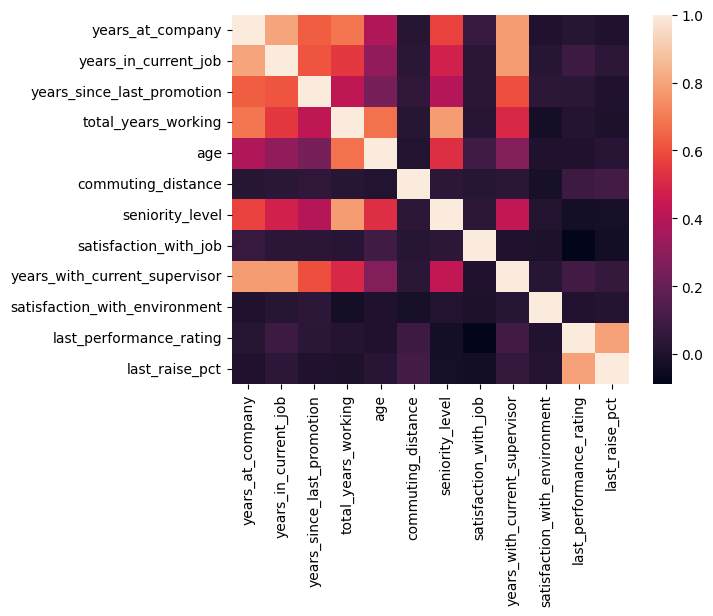

Creating a heatmap to visualize the correlation matrix.
The heatmap provides a graphical representation of the correlation between numerical variables.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix)

# Display the heatmap
plt.show()

# Comment explaining the code
print("Creating a heatmap to visualize the correlation matrix.")

# Additional comment
print("The heatmap provides a graphical representation of the correlation between numerical variables.")


In [ ]:
# Remove 'total_years_working' and 'years_at_company' from numerical_vars
num_variables.remove('total_years_working')
num_variables.remove('years_at_company')

# Comment explaining the code
print("Removing 'total_years_working' and 'years_at_company' from the numerical_vars list.")

# Additional comment
print("These variables are no longer considered as numerical variables.")


Removing 'total_years_working' and 'years_at_company' from the numerical_vars list.
These variables are no longer considered as numerical variables.


Due to the presence of multicollinearity, it has been determined that the variables "total_years_working" and "years_at_company" will be excluded from the list of numerical variables.

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [ ]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into train and test sets
train, test = train_test_split(df, test_size=0.2, random_state=124)

# Print the train set
print("Train set:")
print(train)

# Print the test set
print("Test set:")
print(test)

# Comment explaining the code
print("Splitting the DataFrame into train and test sets.")

# Additional comment
print("The train set contains a portion of the data that will be used for training a model, while the test set contains a portion of the data that will be used for evaluating the model's performance.")


Train set:
    left_company  age frequency_of_travel              department  \
294           No   35       Travel_Rarely  Research & Development   
766          Yes   33       Travel_Rarely  Research & Development   
28            No   47          Non-Travel  Research & Development   
85            No   30       Travel_Rarely                   Sales   
176           No   27       Travel_Rarely  Research & Development   
..           ...  ...                 ...                     ...   
962          Yes   24       Travel_Rarely                   Sales   
135           No   38       Travel_Rarely  Research & Development   
17            No   40       Travel_Rarely  Research & Development   
668          Yes   34          Non-Travel  Research & Development   
462           No   32       Travel_Rarely  Research & Development   

     commuting_distance  education  satisfaction_with_environment  gender  \
294                   7          3                              3    Male   
766   

# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define the numerical pipeline
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessor pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, num_variables),
    ('cat', categorical_pipeline, cate_variable)
])

# Transform the training data
train_processed = preprocessor.fit_transform(train)


In [ ]:
# Extracting the numerical features from the processed data
numerical_features = train_processed[:, :7]
numerical_features_shape = numerical_features.shape

# Comment explaining the code
print("Extracting the numerical features from the processed data.")

# Additional comment
print(f"The shape of the numerical features is: {numerical_features_shape}")



Extracting the numerical features from the processed data.
The shape of the numerical features is: (800, 7)


In [ ]:
# Extracting the categorical features from the processed data
categorical_features = train_processed[:, 7:]
categorical_features_shape = categorical_features.shape
categorical_features_shape

(800, 39)

# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic regression pipeline
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=124))
])

# Fit the model on the training data
logreg_pipeline.fit(train, train['left_company'])

# Predict the training and test sets
train_predictions = logreg_pipeline.predict(train)
test_predictions = logreg_pipeline.predict(test)

# Calculate the accuracy on the training and test sets
training_accuracy = accuracy_score(train['left_company'], train_predictions)
testing_accuracy = accuracy_score(test['left_company'], test_predictions)


In [ ]:
print(training_accuracy)
print(testing_accuracy)

1.0
1.0


The train accuracy and test accuracy are same so I feel that the model is overfitting the data